# An example of the Expectation-Maximization (EM) algorithm

We consider a sample $Y_1, \dots, Y_n$ from the mixture density

$$ (1-p)\phi_{\mu_0, 1}(y) + p\phi_{\mu_1,1}(y),$$

where $\phi_{\mu,\sigma}(y)$ is the Gaussian density with mean $\mu$ and variance $\sigma$, to illustrate the EM algorithm used to find the maximum likelihood estimator of the parameters.

## Generate dataset

We start by generating a dataset consisting of 100 samples with $p=0.3$, $\mu_0 = 0$ and $\mu_1 = 10$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 100

sample = []
cl = [] # To store the class indices

p = 0.3
mu0 = 0
mu1 = 10

# There is probably a better way to do this...
for i in range(n):
    u = np.random.rand();
    if (u <= 1-p):
        sample.append(np.random.normal(mu0,1));
        cl.append(0)
    else:
        sample.append(np.random.normal(mu1,1));
        cl.append(1)
        
data = pd.DataFrame(list(zip(sample,cl)), columns = ['Sample', 'Type'])

In [3]:
data.head()

,Sample,Type
0,-0.420985,0
1,-0.484146,0
2,9.920703,1
3,10.609991,1
4,0.080962,0


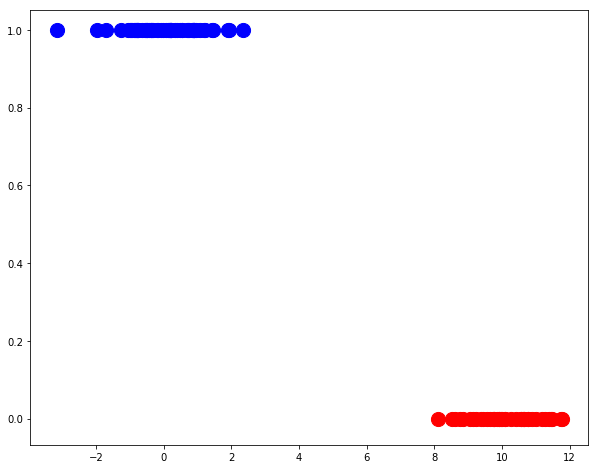

In [4]:
plt.figure(figsize=(10,8))
type1_data = data[data.Type == 1]
type0_data = data[data.Type == 0]
plt.scatter(type1_data.Sample, np.zeros(len(type1_data)), s = 200, c = 'r');
plt.scatter(type0_data.Sample, np.ones(len(type0_data)), s = 200, c = 'b');

plt.show()

## The iteration rule

Now we implement a function carrying out the iterative step using the formulas derived in class. Recall that we first introduced the auxiliary quantity

$$\tau_i^{(j)} = \frac{p^{(j)}\phi_{\mu_1^{(j)},1}(y_i)}{p^{(j)}\phi_{\mu_1^{(j)},1}(y_i)+(1-p^{(j)})\phi_{\mu_0^{(j)},1}(y_i)}$$

in terms of which the update rule takes the form

$$p^{(j+1)}=\frac{1}{n}\sum_{i=1}^n\tau_i^{(j)},\qquad\mu_0^{(j+1)}=\frac{\sum_{i=1}^ny_i(1-\tau_i^{(j)})}{\sum_{i=1}^n(1-\tau_i^{(j)})},\qquad \mu_1^{(j+1)}=\frac{\sum_{i=1}^ny_i\tau_i^j}{\sum_{i=1}^n\tau_i^j}$$


In [5]:
from scipy import stats

In [6]:
def tau(p, mu0, mu1, data):
    # Computes the tau-factors
    a = stats.norm.pdf(data, loc=mu0, scale=1);
    b = stats.norm.pdf(data, loc=mu1, scale=1);
    
    return p * b / (p * b + (1-p) * a)
    
def update(p_old, mu0_old, mu1_old, y_data):
    # Update rule for the iteration
    if p_old == 1:
        return [1, mu0_old, y_data.mean()]
    elif p_old == 0:
        return [0, y_data.mean(), mu1_old]
    else:
        tau_factors = tau(p_old, mu0_old, mu1_old, y_data);
        p_new = tau_factors.mean()
        mu0_new = np.dot(y_data, 1-tau_factors) / (1-tau_factors).sum()
        mu1_new = np.dot(y_data, tau_factors) / tau_factors.sum()
        return [p_new, mu0_new, mu1_new]

def log_likelihood(p, mu0, mu1, data):
    return (np.log((1-p)*stats.norm.pdf(data, loc=mu0, scale=1) + p * stats.norm.pdf(data, loc=mu1, scale=1))).sum();

## The iteration

In [7]:
initial_theta = [0.1, 0, 1]

In [8]:
num_of_iter = 15

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.1, 0, 1] log-Likelihood: -1893.42
 1. p: 0.45, mu0: -0.04, mu1: 9.00   log-Likelihood: -231.14 
 2. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 3. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 4. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 5. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 6. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 7. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 8. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
 9. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
10. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
11. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
12. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
13. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
14. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 
15. p: 0.40, mu0: 0.04, mu1: 10.12   log-Likelihood: -205.46 


Note that the algorithm converges pretty quickly. We coul tweak this implementation by stopping the iteration, when the log-likelihood is not increasing anymore.

## Non-separable data

The above situation worked well because the two components of the mixture were well separated. Let us look at the case of non-separable data.

In [9]:
n = 100

sample = []
cl = []

p = 0.3
mu0 = 0
mu1 = 2

# There is probably a better way to do this...
for i in range(n):
    u = np.random.rand();
    if (u <= 1-p):
        sample.append(np.random.normal(mu0,1));
        cl.append(0)
    else:
        sample.append(np.random.normal(mu1,1));
        cl.append(1)
        
data = pd.DataFrame(list(zip(sample,cl)), columns = ['Sample', 'Type'])

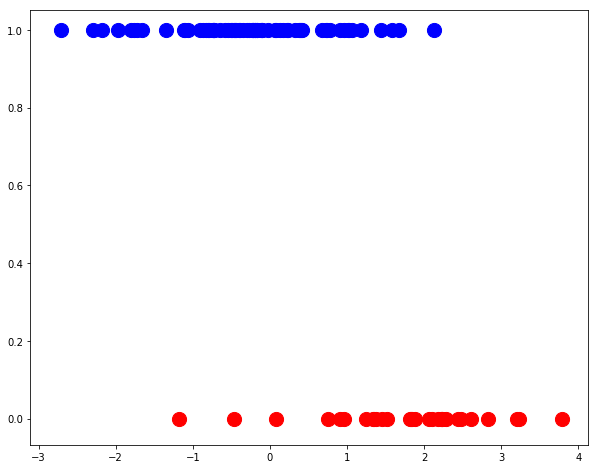

In [10]:
plt.figure(figsize=(10,8))
type1_data = data[data.Type == 1]
type0_data = data[data.Type == 0]
plt.scatter(type1_data.Sample, np.zeros(len(type1_data)), s = 200, c = 'r');
plt.scatter(type0_data.Sample, np.ones(len(type0_data)), s = 200, c = 'b');

plt.show()

In [11]:
initial_theta = [0.1, -1, 1]

num_of_iter = 30

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.1, -1, 1] log-Likelihood: -213.39
 1. p: 0.32, mu0: -0.28, mu1: 1.72   log-Likelihood: -169.40 
 2. p: 0.32, mu0: -0.28, mu1: 1.72   log-Likelihood: -169.40 
 3. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 4. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 5. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 6. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 7. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 8. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 9. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
10. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
11. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
12. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
13. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
14. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
15. p: 0.32, mu0: -0.29, mu1: 1.70   log-Likelihood: -169.40 
16. p: 0.32, mu0: -0.29,

Here we see that while the log likelihood is increasing on every step as it should. The parameter values are not getting close to the real one. In general, we cannot guarrantee that we will find the global maximum of the likelihood function, we can get stuck in a local maximum as well and therefore a lot depends on initialization. Also note that our estimator itself is random so we are also limited by the finite sample size:

In [32]:
initial_theta = [0.3, 0, 2]

num_of_iter = 30

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.3, 0, 2] log-Likelihood: -170.81
 1. p: 0.28, mu0: 0.10, mu1: 2.03   log-Likelihood: -169.97 
 2. p: 0.25, mu0: 0.14, mu1: 2.12   log-Likelihood: -169.39 
 3. p: 0.23, mu0: 0.16, mu1: 2.22   log-Likelihood: -168.82 
 4. p: 0.21, mu0: 0.19, mu1: 2.33   log-Likelihood: -168.27 
 5. p: 0.19, mu0: 0.21, mu1: 2.45   log-Likelihood: -167.76 
 6. p: 0.17, mu0: 0.23, mu1: 2.57   log-Likelihood: -167.30 
 7. p: 0.16, mu0: 0.25, mu1: 2.69   log-Likelihood: -166.92 
 8. p: 0.14, mu0: 0.27, mu1: 2.80   log-Likelihood: -166.63 
 9. p: 0.13, mu0: 0.28, mu1: 2.89   log-Likelihood: -166.41 
10. p: 0.13, mu0: 0.30, mu1: 2.98   log-Likelihood: -166.26 
11. p: 0.12, mu0: 0.31, mu1: 3.05   log-Likelihood: -166.16 
12. p: 0.11, mu0: 0.32, mu1: 3.11   log-Likelihood: -166.10 
13. p: 0.11, mu0: 0.32, mu1: 3.15   log-Likelihood: -166.06 
14. p: 0.11, mu0: 0.33, mu1: 3.18   log-Likelihood: -166.04 
15. p: 0.10, mu0: 0.33, mu1: 3.21   log-Likelihood: -166.03 
16. p: 0.10, mu0: 0.34, mu1: 3.23   log-

Now let us try this on a much larger dataset:

In [35]:
n = 1000

sample = []
cl = []

p = 0.3
mu0 = 0
mu1 = 2

# There is probably a better way to do this...
for i in range(n):
    u = np.random.rand();
    if (u <= 1-p):
        sample.append(np.random.normal(mu0,1));
        cl.append(0)
    else:
        sample.append(np.random.normal(mu1,1));
        cl.append(1)
        
data = pd.DataFrame(list(zip(sample,cl)), columns = ['Sample', 'Type'])

In [36]:
initial_theta = [0.3, 0, 2]

num_of_iter = 30

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.3, 0, 2] log-Likelihood: -1667.82
 1. p: 0.29, mu0: 0.05, mu1: 1.91   log-Likelihood: -1665.36 
 2. p: 0.29, mu0: 0.06, mu1: 1.89   log-Likelihood: -1665.15 
 3. p: 0.29, mu0: 0.06, mu1: 1.88   log-Likelihood: -1665.12 
 4. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
 5. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
 6. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
 7. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
 8. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
 9. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
10. p: 0.29, mu0: 0.07, mu1: 1.88   log-Likelihood: -1665.12 
11. p: 0.29, mu0: 0.07, mu1: 1.89   log-Likelihood: -1665.12 
12. p: 0.29, mu0: 0.07, mu1: 1.89   log-Likelihood: -1665.12 
13. p: 0.29, mu0: 0.07, mu1: 1.89   log-Likelihood: -1665.12 
14. p: 0.29, mu0: 0.07, mu1: 1.89   log-Likelihood: -1665.12 
15. p: 0.29, mu0: 0.07, mu1: 1.89   log-Likelihood: -1665.12 
16. p: 0.29, mu0: 0.07, 

Much better. Also note that the convergence is also much faster. Here is one more with the off initialization:

In [15]:
initial_theta = [0.1, -1, 1]

num_of_iter = 30

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.1, -1, 1] log-Likelihood: -213.39
 1. p: 0.32, mu0: -0.28, mu1: 1.72   log-Likelihood: -169.40 
 2. p: 0.32, mu0: -0.28, mu1: 1.72   log-Likelihood: -169.40 
 3. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 4. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 5. p: 0.32, mu0: -0.28, mu1: 1.71   log-Likelihood: -169.40 
 6. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 7. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 8. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
 9. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
10. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
11. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
12. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
13. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
14. p: 0.32, mu0: -0.29, mu1: 1.71   log-Likelihood: -169.40 
15. p: 0.32, mu0: -0.29, mu1: 1.70   log-Likelihood: -169.40 
16. p: 0.32, mu0: -0.29,

Pretty good! On the other hand, look at what happens with really 'bad' initialization:

In [17]:
initial_theta = [0.1, 1, -1]

num_of_iter = 50

theta = initial_theta
ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
print("Initial: {} log-Likelihood: {:.2f}".format(theta, ll))

for i in range(num_of_iter):
    theta = update(theta[0], theta[1], theta[2], data.Sample)
    ll = log_likelihood(theta[0], theta[1], theta[2], data.Sample)
    print("{:2d}. p: {:.2f}, mu0: {:.2f}, mu1: {:.2f}   log-Likelihood: {:.2f} ".format(i+1,theta[0],theta[1],theta[2], ll))

Initial: [0.1, 1, -1] log-Likelihood: -183.24
 1. p: 0.18, mu0: 0.69, mu1: -1.13   log-Likelihood: -175.85 
 2. p: 0.20, mu0: 0.71, mu1: -1.04   log-Likelihood: -175.48 
 3. p: 0.22, mu0: 0.73, mu1: -0.98   log-Likelihood: -175.13 
 4. p: 0.24, mu0: 0.76, mu1: -0.94   log-Likelihood: -174.78 
 5. p: 0.26, mu0: 0.79, mu1: -0.89   log-Likelihood: -174.42 
 6. p: 0.28, mu0: 0.83, mu1: -0.85   log-Likelihood: -174.07 
 7. p: 0.30, mu0: 0.86, mu1: -0.81   log-Likelihood: -173.71 
 8. p: 0.32, mu0: 0.90, mu1: -0.78   log-Likelihood: -173.36 
 9. p: 0.34, mu0: 0.94, mu1: -0.74   log-Likelihood: -173.01 
10. p: 0.37, mu0: 0.98, mu1: -0.71   log-Likelihood: -172.66 
11. p: 0.39, mu0: 1.02, mu1: -0.68   log-Likelihood: -172.32 
12. p: 0.41, mu0: 1.06, mu1: -0.65   log-Likelihood: -171.99 
13. p: 0.43, mu0: 1.10, mu1: -0.62   log-Likelihood: -171.68 
14. p: 0.45, mu0: 1.14, mu1: -0.59   log-Likelihood: -171.38 
15. p: 0.47, mu0: 1.18, mu1: -0.57   log-Likelihood: -171.11 
16. p: 0.49, mu0: 1.23, 

Clearly, this is going for the 'other' maximum of the likelihood function where the roles of the two population are switched. Note that the model density is unchanged under this symmetry: $(0.3, 0, 2)$ gives the exact same dsns

Feel free to play around and get a feel for how the algorithm behaves with different initialization, sample sizes, and parameters.